## Lesson 1: Accessing Spatial Data Files
- There are several ways we typically get spatial data into R:
  + Load spatial files we have on our machine or from remote source
  + Load spatial data that is part of an R package
  + Grab data using API (often making use of particular R packages)
  + Converting flat files with x,y data to spatial data
  + Geocoding data

### Vector Data

The main library I like to use for for reading vector data in Python is `geopandas`. Note that any arguments passed to `geopandas.read_file()` after the file name will be passed directly to `fiona.open()`

We can get a list of supported file formats for vector data using `fiona.supported_drivers`

In [1]:
import fiona
fiona.supported_drivers
# help(fiona.open) #for more details and parameters

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'rw',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'rw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r'}

#### Read in shapefiles with geopandas
Note that geopandas can read a zipped shapefile - no need to download and unzip! An advantage over `st_read` in R with `sf`

In [6]:
import geopandas as gpd
cities = gpd.read_file("ftp://ftp.gis.oregon.gov/adminbound/citylim_2017.zip")
cities.plot()

#### Read in data from ESRI geodatabase with geopandas
First we'll list the layers in the geodatabase.  We can use `fiona.listlayers` to do this.

In [ ]:
fiona.listlayers('E:/GitProjects/AWRA2022GeoWorkshop/Workbooks/R/Session2/OregonStateParks_20181010.gdb')

Here we emulate how we read an ESRI file geodabase file in R with `sf`.  Note that we can specify layer by name or index in `geopandas` (though in this case there is only one layer).

<AxesSubplot:>

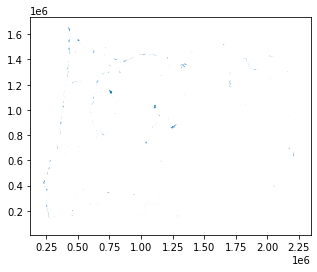

In [9]:
# parks = gpd.read_file('GitProjects/AWRA2022GeoWorkshop/Workbooks/R/Session2/OregonStateParks_20181010.gdb', 
#                     driver='FileGDB', layer='LO_PARKS')
parks = gpd.read_file('GitProjects/AWRA2022GeoWorkshop/Workbooks/R/Session2/OregonStateParks_20181010.gdb', 
                    driver='FileGDB', layer=0)
parks.plot()

#### Read in geopackage file with geopandas

<AxesSubplot:>

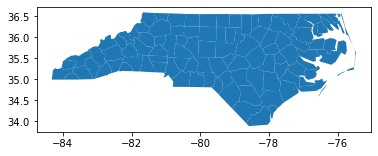

In [6]:
fiona.listlayers('GitProjects/AWRA2022GeoWorkshop/Workbooks/R/Session2/nc.gpkg')
# parks = gpd.read_file('GitProjects/AWRA2022GeoWorkshop/Workbooks/R/Session2/nc.gpkg', 
#                     driver='GPKG', layer='nc')
nc = gpd.read_file('GitProjects/AWRA2022GeoWorkshop/Workbooks/R/Session2/nc.gpkg', 
                    driver='GPKG', layer=0)
nc.plot()

### Open spatial data sources

There's a wealth of open spatial data accessible online now via static URLs or APIs - just a few examples include [Data.gov](https://catalog.data.gov/dataset?metadata_type=geospatial), NASA [SECAC Portal](http://sedac.ciesin.columbia.edu/), [Natural Earth](http://www.naturalearthdata.com/), [UNEP GEOdata](http://geodata.grid.unep.ch/), and countless others listed here at [Free GIS Data](https://freegisdata.rtwilson.com/)

Below is an example similar to what we did in R using `naturalearth` data - note that geopandas only includes a couple datasets from naturalearth - we show using the `naturalearth_lowres` data - to get other `naturalearth` data you need to read in from a zip file directly which we show as well.

In [17]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

<AxesSubplot:>

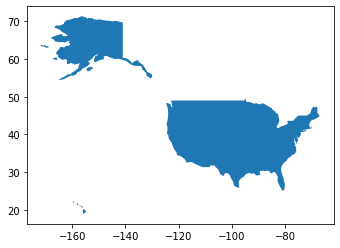

In [9]:
world = gpd.read_file(
    gpd.datasets.get_path("naturalearth_lowres")
)

Here we read in US states directly from a source of [compiled geojson data for the US](https://eric.clst.org/tech/usgeojson/)

<AxesSubplot:>

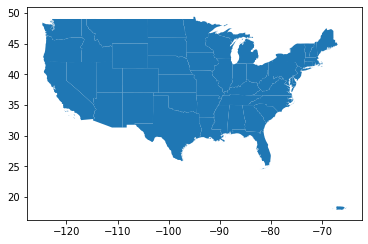

In [26]:
states = gpd.read_file('https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json')
states = states[~states["NAME"].isin(['Hawaii','Alaska'])]
states.plot()
# states.head()

In [37]:
states.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ..."
1,0400000US25,25,Massachusetts,,7800.058,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ..."
2,0400000US26,26,Michigan,,56538.901,"MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ..."
3,0400000US30,30,Montana,,145545.801,"POLYGON ((-104.05770 44.99743, -104.25015 44.9..."
4,0400000US32,32,Nevada,,109781.180,"POLYGON ((-114.05060 37.00040, -114.04999 36.9..."


#### Reading in subsets of vector data
Just read in just Oregon using a row filter - this is a cheat! I looked up the row index for Oregon in the full set above - I don't know how to do a read-in filter using an attribute query with geopandas - does anyone?

<AxesSubplot:>

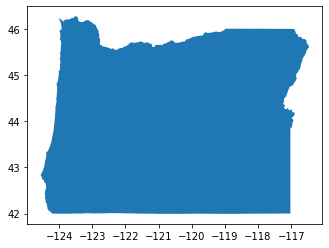

In [45]:
OR = gdf = gpd.read_file('https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json',rows=slice(45,46))
OR.plot()

We can also apply a geometry or bounding box fliter as another type of mask on read-in

D:\Anaconda3\envs\StreamCat\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


<AxesSubplot:>

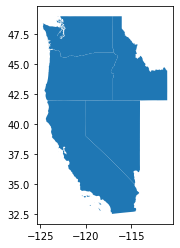

In [46]:
OR_Plus = gpd.read_file('https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json',
    mask=states[states.NAME=="Oregon"],
)
OR_Plus.plot()

Read [the docs](https://geopandas.org/en/stable/docs/user_guide/io.html) the mask above is actually using a spatial filter and reading in data the *intersects* with our filter criteria (i.e. Oregon).  Using a bounding box.

In [47]:
OR.total_bounds

array([-124.565973,   41.991794, -116.463504,   46.271004])

We can truncate that bounding box and pass it in, or use it as is in the bbox argument to read_file - not that the bbox argument requires a tuple, and the `total_bounds` method returns an array - we need to convert the array to a tuple to use

D:\Anaconda3\envs\StreamCat\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


<AxesSubplot:>

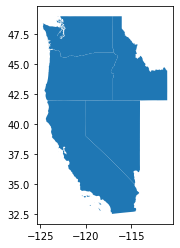

In [55]:
OR_bbox = tuple(OR.total_bounds)
OR = gpd.read_file('https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json',
    bbox=OR_bbox,
)
OR.plot()

In [62]:
bbox = (-122.0, 42.5, -118.0, 45.0)


D:\Anaconda3\envs\StreamCat\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


<AxesSubplot:>

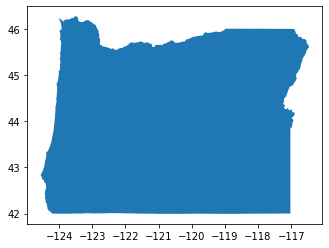

In [63]:
OR = gpd.read_file('https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json',
    bbox=bbox,
)
OR.plot()

#### Exercise
Based on examples of reading in different datasets and subsetting, try to find a dataset online to read in, or try a different subset operation on example datasets so far, or both.